In [4]:
import numpy as np
import pandas as pd
import knn
from knn import MatrixBasedKNearestNeighbor, KDBasedKNearestNeighbor

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
!ls ./data

test.csv  train.csv


In [124]:
test = pd.read_csv("./data/test.csv")
print test.shape
test.head()

(2500, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df = pd.read_csv('data/train.csv')
# df[df.pixel677>0].pixel677
df.head()
print df.shape

(20000, 785)


In [125]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df.groupby('label')['label'].count()

label
0    1994
1    2281
2    1929
3    2076
4    1945
5    1775
6    1971
7    2093
8    1922
9    2014
Name: label, dtype: int64

In [6]:
X_train, Y_train = df[df.columns[1:]].values, df['label'].values

In [43]:
def plot_image(img, im_size=28):
    pylab.imshow(img.reshape(im_size, im_size), cmap=pylab.cm.gray)
    
def plot_grid(imgs, nrows, ncols, im_size=28):
    fig = pyplot.gcf()
    fig.set_size_inches(17.5,15.5)
    for pylab_index, img in enumerate(imgs):
        pylab.subplot(nrows, ncols, pylab_index + 1)
        plot_image(img)
        pylab.axis('off')

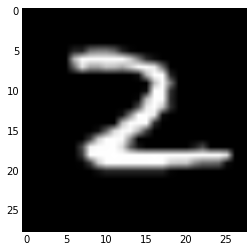

In [44]:
plot_image(X_train[56])

## Plot means

In [28]:
average_class_imgs = []

for c in xrange(10):
    #########################################################################
    # TODO:                                                                 #
    # Use pandas and numpy to evaluate mean inclass image                   #
    # Put your code hear                                                    #
    #########################################################################
    
    mean_c = np.array([df.groupby('label').get_group(c)['pixel'+str(col)].mean() for col in xrange(0,784)])
    average_class_imgs.append(mean_c)
    pass

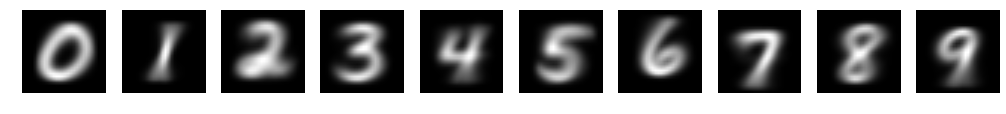

In [36]:
# Plot your means, note that is should be similar on to real smooth numbers
plot_grid(average_class_imgs, nrows=1, ncols=10)

## Code Matrix Based KNN

In [79]:
# Code matrix based KNN with L2 norm by feel MatrixBasedKNearestNeighbor class
# Use predict on to X_train[:100] only for debug

In [196]:
# KNN two loops

knn_clf_loop2 = MatrixBasedKNearestNeighbor(num_loops=2)
knn_clf_loop2 = knn_clf_loop2.fit(X_train[:1000], Y_train[:1000])
%time y_pred = knn_clf_loop2.predict(X_train[1000:1200])

CPU times: user 2min 15s, sys: 2.22 s, total: 2min 18s
Wall time: 2min 21s


In [197]:
len(y_pred[y_pred == Y_train[1000:1200]])/(len(y_pred)*1.0)

0.86

In [195]:
# KNN one loops

knn_clf_loop1 = MatrixBasedKNearestNeighbor(num_loops=1)
knn_clf_loop1 = knn_clf_loop1.fit(X_train[:1000], Y_train[:1000])
%time y_pred = knn_clf_loop1.predict(X_train[1000:1200])

CPU times: user 4.41 s, sys: 740 ms, total: 5.15 s
Wall time: 5.26 s


In [198]:
len(y_pred[y_pred == Y_train[1000:1200]])/(len(y_pred)*1.0)

0.86

In [199]:
#check yourself
print 'good' if np.linalg.norm(knn_clf_loop1.dist_mtx - knn_clf_loop2.dist_mtx) < 1e-4 else 'fail'

good


In [192]:
# KNN no loops

knn_clf_loop3 = MatrixBasedKNearestNeighbor(num_loops=0)
knn_clf_loop3 = knn_clf_loop3.fit(X_train[:1000], Y_train[:1000])
%time y_pred = knn_clf_loop3.predict(X_train[1000:1200])

CPU times: user 2.06 s, sys: 4.52 s, total: 6.58 s
Wall time: 8.94 s


In [200]:
#check yourself
print 'good' if np.linalg.norm(knn_clf_loop1.dist_mtx - knn_clf_loop3.dist_mtx) < 1e-4 else 'fail'

good


## Code kd_tree based KNN

In [397]:
tree.valid_metrics

['chebyshev',
 'euclidean',
 'cityblock',
 'manhattan',
 'infinity',
 'minkowski',
 'p',
 'l2',
 'l1']

In [139]:
# KNN kd_tree

knn_clf_loop4 = knn.KDBasedKNearestNeighbor()
knn_clf_loop4 = knn_clf_loop4.fit(X_train[:3000], Y_train[:3000])
%time y_pred = knn_clf_loop4.predict(X_train[3000:3200])

knn.score_conf_mtx(y_pred, Y_train[3000:3200])


CPU times: user 1.14 s, sys: 14.3 ms, total: 1.16 s
Wall time: 1.17 s
[[19  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  1  0]
 [ 0  0  0 17  0  1  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  2]
 [ 0  0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  1  0  0  0  0  0 13  0  0]
 [ 0  0  0  1  1  0  0  1 24  1]
 [ 0  0  0  0  1  0  1  1  0 20]]


0.88

## Code Accuracy score and Cross Validation Process

In [11]:
# Accuracy

def accuracy(y_true, y_pred):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    score = 1 - len((y_pred - y_true)[(y_pred - y_true)!=0])/(len(y_true)*1.0)
    # Evaluate accuracy efficient using numpy 
    return score

In [141]:
print 'good' if accuracy([1, 1, 1, 0], [1, 1, 1, 5]) == 0.75 else 'fail'

good


In [12]:
# Cross validation

def cross_validation(X, y, cv_fold=5, k = 3, kernel = "quartical", p = 2):
    scores = []
    samples = int(trunc(len(X)/(cv_fold*1.0)))
    devision_x = np.array([X[i:i+samples] for i in range(0, len(X), samples) if i+samples <= len(X)])
#     print "devision_X:", devision_x.shape
    devision_y = np.array([y[i:i+samples] for i in range(0, len(y), samples) if i+samples <= len(y)])
    
    for i in range(0,cv_fold):
        train_x = np.concatenate(devision_x[np.array([True]*i+[False]+[True]*(cv_fold-i-1))])
        print "train_x:", train_x.shape
        train_y = np.concatenate(devision_y[np.array([True]*i+[False]+[True]*(cv_fold-i-1))])
        print "train_y:", train_y.shape
        
        
        test_x = devision_x[i]
        print "test_x", test_x.shape
        test_y = devision_y[i]
        
        knn_clf = knn.KDBasedKNearestNeighbor()
        knn_clf = knn_clf.fit(train_x, train_y, k = k, kernel = kernel, p = p)
        y_pred = knn_clf.predict(test_x)
        scores.append(accuracy(y_pred, test_y))
#         print knn.score_conf_mtx(y_pred, test_y)
        print accuracy(y_pred, test_y)
        print "#"*8
    
    # Put your code here
    return np.mean(scores)

In [145]:
cross_validation(X_train[:11000], Y_train[:11000], 6, kernel = "Epanechnikov")

train_x: (9165, 784)
train_y: (9165,)
test_x (1833, 784)
0.943262411348
########
train_x: (9165, 784)
train_y: (9165,)
test_x (1833, 784)
0.952536824877
########
train_x: (9165, 784)
train_y: (9165,)
test_x (1833, 784)
0.948717948718
########
train_x: (9165, 784)
train_y: (9165,)
test_x (1833, 784)
0.936715766503
########
train_x: (9165, 784)
train_y: (9165,)
test_x (1833, 784)
0.935079105292
########
train_x: (9165, 784)
train_y: (9165,)
test_x (1833, 784)
0.953082378614
########


0.94489907255864714

# Delete noise in train

In [34]:
from sklearn.neighbors import KDTree

z = 5000
def count_number(number, arr):
    y = np.bincount(arr)
    if len(y)<=number:
        return 0
    return y[number]

to_del = range(z)
kd_tree = KDTree(X_train[:z], leaf_size = 40, metric = "minkowski", p = 2)
for i in range(0, len(X_train[:z])):
    dist, ind = kd_tree.query(X_train[i], k=10)
    tmp_array = Y_train[ind][0]
    if count_number(Y_train[i], tmp_array) < 5:
        to_del.remove(i)
print z - len(to_del)

288


In [35]:
good_train_x = X_train[to_del]
good_train_y = Y_train[to_del]
print len(good_train_x)

4712


### So, let's try cross val on data with noise:

In [14]:
cross_validation(X_train[:5000], Y_train[:5000], k = 5, cv_fold = 5, kernel = "T")

train_x: (4000, 784)
train_y: (4000,)
test_x (1000, 784)
0.931
########
train_x: (4000, 784)
train_y: (4000,)
test_x (1000, 784)
0.933
########
train_x: (4000, 784)
train_y: (4000,)
test_x (1000, 784)
0.943
########
train_x: (4000, 784)
train_y: (4000,)
test_x (1000, 784)
0.934
########
train_x: (4000, 784)
train_y: (4000,)
test_x (1000, 784)
0.929
########


0.93399999999999994

### And here cross val on data without noise:

In [36]:
cross_validation(good_train_x, good_train_y, k = 5, cv_fold = 5, kernel = "T")

train_x: (3768, 784)
train_y: (3768,)
test_x (942, 784)
0.978768577495
########
train_x: (3768, 784)
train_y: (3768,)
test_x (942, 784)
0.97983014862
########
train_x: (3768, 784)
train_y: (3768,)
test_x (942, 784)
0.97983014862
########
train_x: (3768, 784)
train_y: (3768,)
test_x (942, 784)
0.973460721868
########
train_x: (3768, 784)
train_y: (3768,)
test_x (942, 784)
0.963906581741
########


0.9751592356687897

It's great!

# Param search

In [101]:
def MyGridSearch(train_X, train_Y, k_range, kernel_list, cv = 2):
    result = np.zeros((len(k_range), len(kernel_list)))
    max_score = 0
    best_k = 0
    best_kernel = ""
    i,j = 0,0
    for k in k_range:
        print "K IS: ", k
        for kernel in kernel_list:
            print "KERNEL IS ", kernel
            score = cross_validation(train_X, train_Y, cv_fold=cv, k = k, kernel = kernel)
            result[i,j] = score
            if score > max_score:
                max_score = score
                best_k = k
                best_kernel = kernel
            j+=1
        i+=1
        j = 0
    return result, (max_score, best_k, best_kernel)


In [147]:
parameters = {'k':range(1,8), 'kernel':["Epanechnikov", "T", "quartical"]}

res, (max_scr, K, kern) = MyGridSearch(X_train[:12000], Y_train[:12000], parameters["k"], parameters["kernel"], cv = 5)

K IS:  1
KERNEL IS  Epanechnikov
train_x: (9600, 784)
train_y: (9600,)
test_x (2400, 784)
0.942916666667
########
train_x: (9600, 784)
train_y: (9600,)
test_x (2400, 784)
0.949583333333
########
train_x: (9600, 784)
train_y: (9600,)
test_x (2400, 784)
0.944166666667
########
train_x: (9600, 784)
train_y: (9600,)
test_x (2400, 784)
0.935833333333
########
train_x: (9600, 784)
train_y: (9600,)
test_x (2400, 784)
0.945833333333
########
KERNEL IS  T
train_x: (9600, 784)
train_y: (9600,)
test_x (2400, 784)
0.942916666667
########
train_x: (9600, 784)
train_y: (9600,)
test_x (2400, 784)
0.949583333333
########
train_x: (9600, 784)
train_y: (9600,)
test_x (2400, 784)
0.944166666667
########
train_x: (9600, 784)
train_y: (9600,)
test_x (2400, 784)
0.935833333333
########
train_x: (9600, 784)
train_y: (9600,)
test_x (2400, 784)
0.945833333333
########
KERNEL IS  quartical
train_x: (9600, 784)
train_y: (9600,)
test_x (2400, 784)
0.942916666667
########
train_x: (9600, 784)
train_y: (9600,)
test

In [148]:
print max_scr, K, kern
res

0.951583333333 5 T


array([[ 0.94366667,  0.94366667,  0.94366667],
       [ 0.94366667,  0.94366667,  0.94366667],
       [ 0.9485    ,  0.9475    ,  0.9485    ],
       [ 0.94925   ,  0.94966667,  0.94941667],
       [ 0.94991667,  0.95158333,  0.9495    ],
       [ 0.94925   ,  0.95083333,  0.95016667],
       [ 0.94675   ,  0.94933333,  0.94941667]])

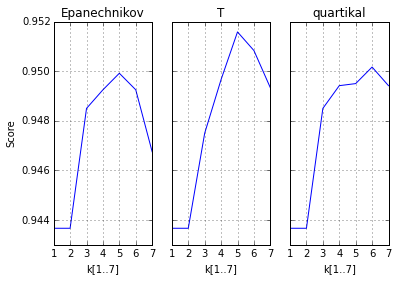

In [182]:
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.plot(range(1,8),res[:,0])
ax1.set_title('Epanechnikov')
ax1.set_xlabel("k[1..7]")
ax1.set_ylabel("Score")
ax1.grid(True)

ax2.plot(range(1,8),res[:,1])
ax2.set_title('T')
ax2.set_xlabel("k[1..7]")
ax2.grid(True)


ax3.plot(range(1,8),res[:,2])
ax3.set_title('quartikal')
ax3.set_xlabel("k[1..7]")
ax3.grid(True)


# MNIST competition

In [157]:
test = pd.read_csv("./kaggle/test.csv")
train = pd.read_csv("./kaggle/train.csv")

X_train, Y_train = train[train.columns[1:]].values, train['label'].values
X_test = test.values

print len(X_test)

knn_clf = knn.KDBasedKNearestNeighbor()
knn_clf = knn_clf.fit(X_train[:11000], Y_train[:11000], k = 5, kernel = "T")
%time y_pred = knn_clf.predict(X_test)

result = pd.DataFrame({"ImageId": range(1, len(y_pred)+1), "Label":y_pred})
result.head()
result.to_csv("kaggle.csv", index = None)

28000
CPU times: user 9min 43s, sys: 7.49 s, total: 9min 51s
Wall time: 10min 6s


In [59]:
### WITHOUT NOISE ###

def del_noise(X_train, Y_train):
    
    def count_number(number, arr):
        y = np.bincount(arr)
        if len(y)<=number:
            return 0
        return y[number]
    
    z = len(X_train)
    to_del = range(z)
    kd_tree = KDTree(X_train, leaf_size = 40, metric = "minkowski", p = 2)
    for i in range(0, z):
        dist, ind = kd_tree.query(X_train[i], k=10)
        tmp_array = Y_train[ind][0]
        if count_number(Y_train[i], tmp_array) < 5:
            to_del.remove(i)

    print "deleted: ", z - len(to_del)
    good_train_x = X_train[to_del]
    good_train_y = Y_train[to_del]
    return good_train_x, good_train_y    

In [60]:
test = pd.read_csv("./kaggle/test.csv")
train = pd.read_csv("./kaggle/train.csv")

X_train, Y_train = train[train.columns[1:]].values, train['label'].values
X_test = test.values


nn_tr_x, nn_tr_y = del_noise(X_train[:11000], Y_train[:11000])

deleted:  507


In [58]:
knn_clf = knn.KDBasedKNearestNeighbor()
knn_clf = knn_clf.fit(nn_tr_x, nn_tr_y, k = 5, kernel = "T")
%time y_pred = knn_clf.predict(X_test)

result = pd.DataFrame({"ImageId": range(1, len(y_pred)+1), "Label":y_pred})
result.head()
result.to_csv("kaggle.csv", index = None)

CPU times: user 3min 41s, sys: 3.89 s, total: 3min 45s
Wall time: 3min 55s
